# TinyML - K-Nearest Neighbors (KNN Classifier)

#### Federal University of Rio Grande do Norte

#### Name: Thommas Kevin Sales Flores

## 0. Install the libraries listed in the requirements.txt file

In [123]:
#!pip install -r requirements.txt

## 1. Importing libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

Breast Cancer Wisconsin (Diagnostic) Data Set

Attribute Information:

ID number
Diagnosis (M = malignant, B = benign)
3-32)
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [125]:
df = pd.read_csv('./data/KNNAlgorithmDataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [127]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 3. Clean Data

In [128]:
# Display the dataframe after cleaning
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [129]:
df = df.drop(['id','Unnamed: 32'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
# Removing rows with missing values
df.dropna(inplace=True)

In [131]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## 4. Exploratory Data Analysis

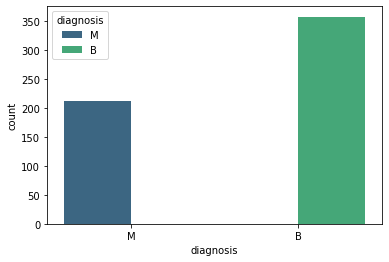

In [132]:
sns.countplot(data=df,x='diagnosis',hue='diagnosis',palette='viridis')
plt.savefig('.\\figures\\diagnosis.png', dpi=300, bbox_inches='tight')

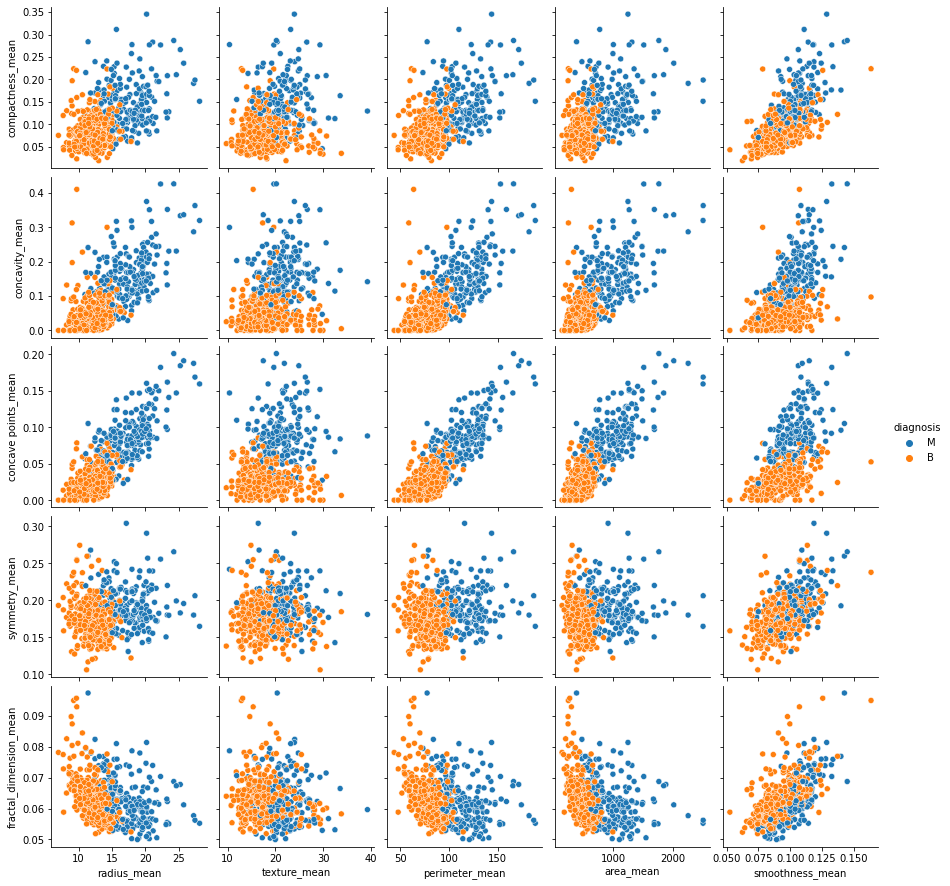

In [133]:
sns.pairplot(data=df,
             x_vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean'] ,
             y_vars=['compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] ,
            hue='diagnosis');
plt.savefig('.\\figures\\pairplot.png', dpi=300, bbox_inches='tight')

In [134]:
corr = df.corr()

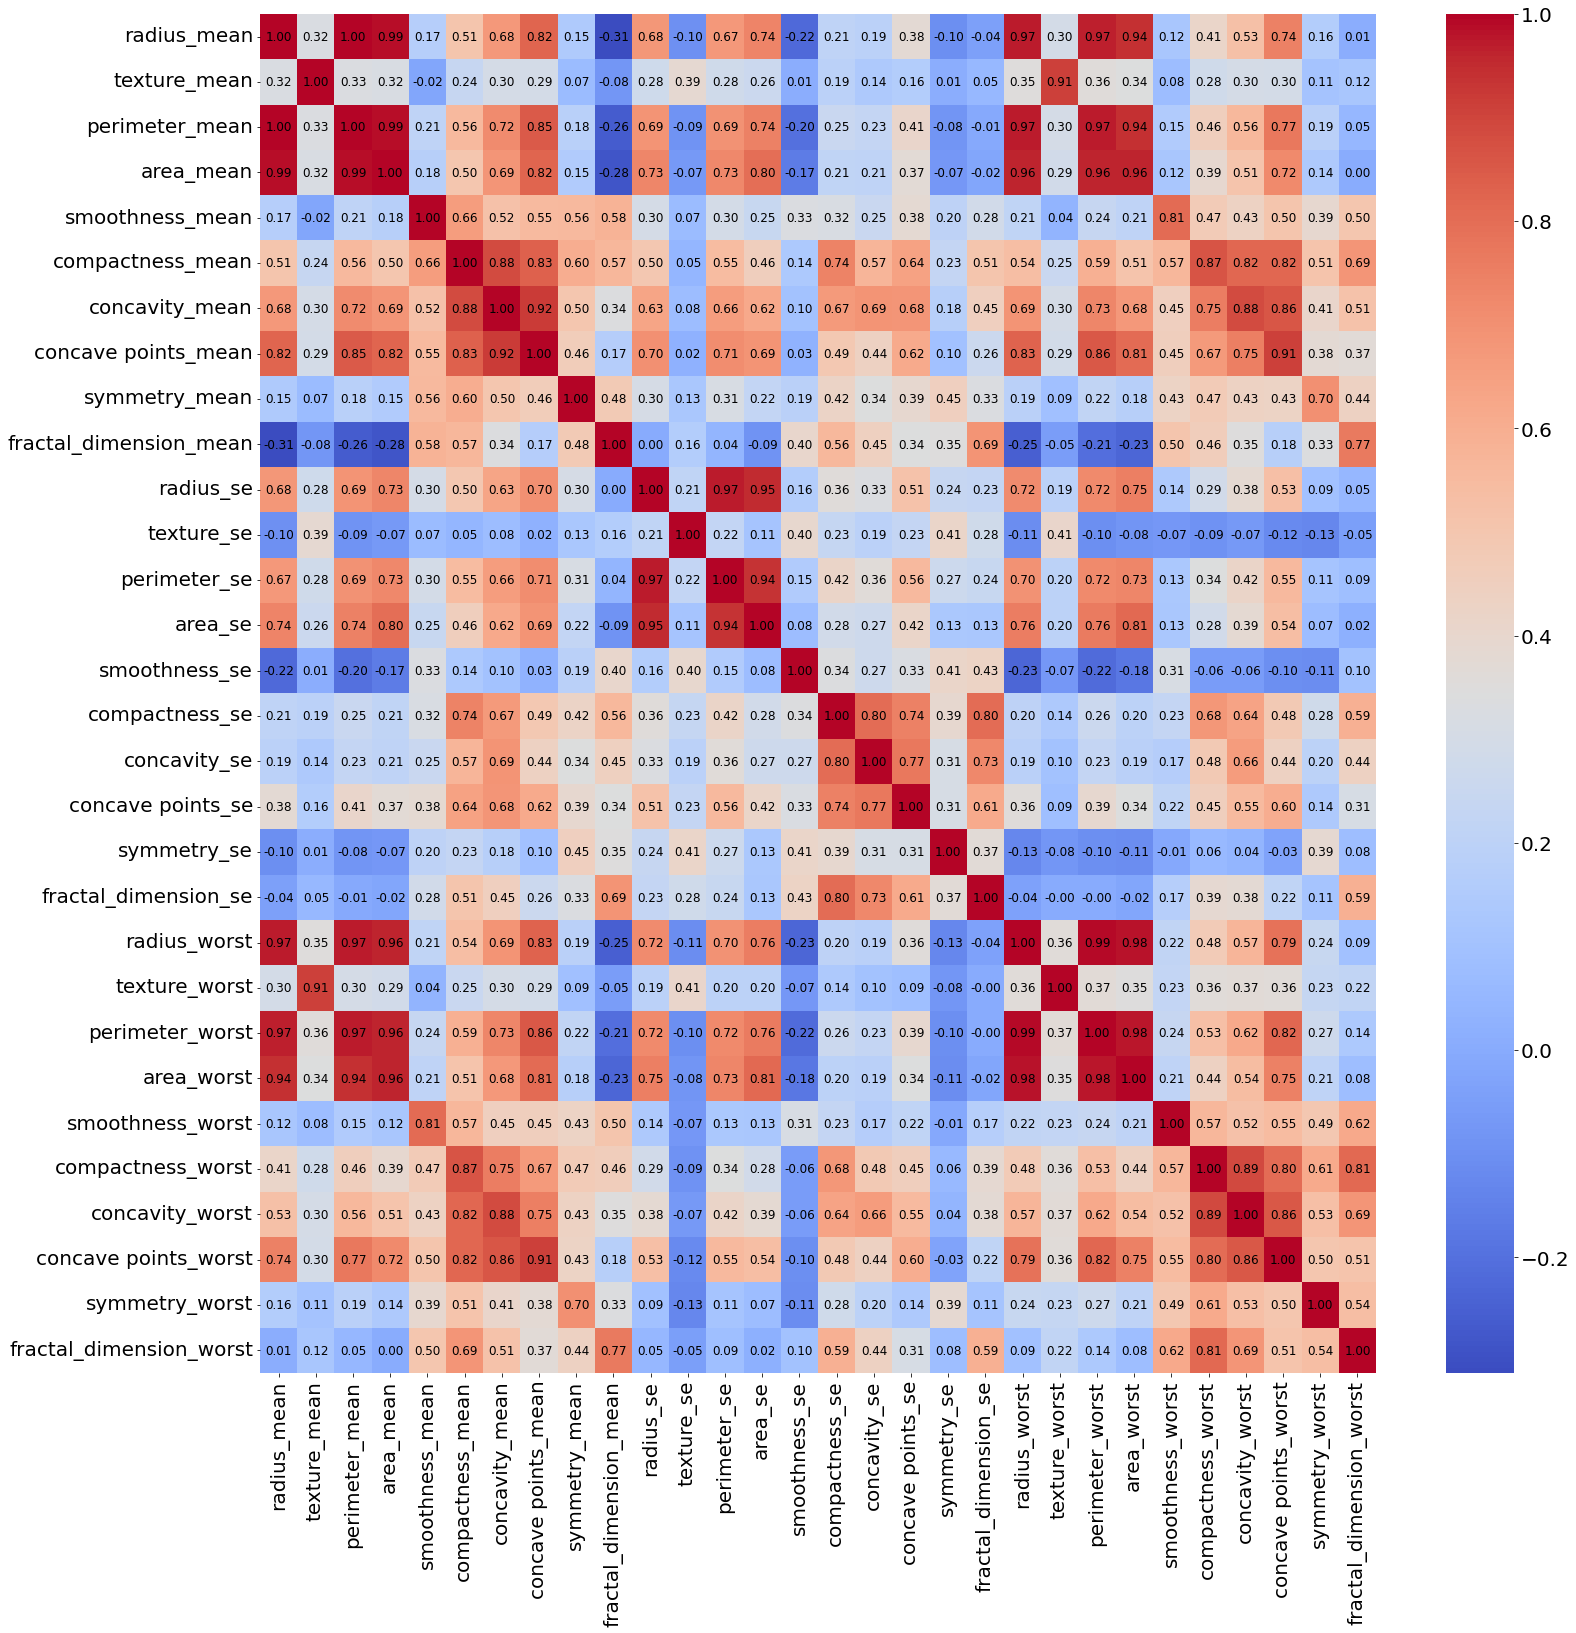

In [135]:
# Adjusting the size of the figure
plt.figure(figsize=(25,25))
# Your existing code for generating the heatmap
heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
# Adding values to the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=12)

plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.savefig('.\\figures\\heatmap.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

In [136]:
df['diagnosis'] = df['diagnosis'].apply(lambda x : 0 if x=='B' else 1)
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [137]:
# Top 5 correlated variables with the diagnosis
abs(df.corr()['diagnosis']).sort_values().tail()

radius_worst            0.776454
concave points_mean     0.776614
perimeter_worst         0.782914
concave points_worst    0.793566
diagnosis               1.000000
Name: diagnosis, dtype: float64

## 5. Splitting the data

In [138]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [139]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (398, 30)
X_test:  (171, 30)
y_train:  (398,)
y_test:  (171,)


## 5. K-Neighbors Classifier

### 5.1 Create the model

In [141]:
scaler = StandardScaler()

In [142]:
knn = KNeighborsClassifier()

In [143]:
pipl =  Pipeline([('scaler',scaler),('knn',knn)])

In [144]:
k_values = np.arange(1,31)
param_grid = {'knn__n_neighbors':k_values}

In [145]:
final_model = GridSearchCV(estimator=pipl,param_grid=param_grid,cv=5,scoring='accuracy')

### 5.2 Train Model 

In [146]:
final_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [147]:
final_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=10))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 10,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [148]:
knn_final = KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='auto',  n_neighbors=10)
knn_final.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

## 6. Model evaluation

### 6.1 Result parameter tuning

In [149]:
df_result = pd.DataFrame(final_model.cv_results_)
df_result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004399,0.001496,0.007200,0.001938,1,{'knn__n_neighbors': 1},0.9125,0.9375,0.9375,0.936709,0.924051,0.929652,0.009985,30
1,0.003879,0.001087,0.005277,0.001211,2,{'knn__n_neighbors': 2},0.9625,0.9375,0.9625,0.949367,0.911392,0.944652,0.019061,29
2,0.003392,0.000789,0.004596,0.000799,3,{'knn__n_neighbors': 3},0.9500,0.9500,0.9875,0.962025,0.936709,0.957247,0.017117,4
3,0.003614,0.001341,0.004595,0.001197,4,{'knn__n_neighbors': 4},0.9500,0.9625,0.9750,0.949367,0.936709,0.954715,0.013016,10
4,0.003188,0.001151,0.003820,0.000384,5,{'knn__n_neighbors': 5},0.9500,0.9625,0.9750,0.949367,0.936709,0.954715,0.013016,10


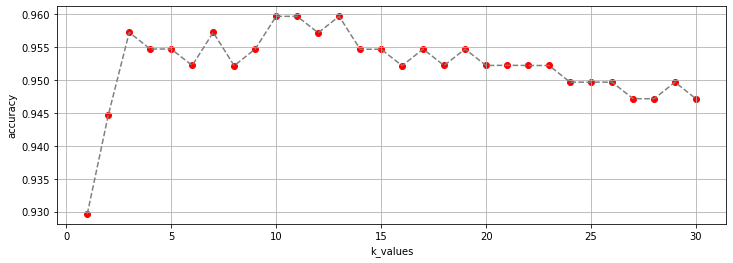

In [150]:
plt.figure(figsize=(12,4))
plt.plot(k_values,df_result['mean_test_score'],c='gray',ls='--')
plt.xlabel('k_values')
plt.ylabel('accuracy')
plt.scatter(k_values,df_result['mean_test_score'],c='red',marker='o')
plt.savefig('.\\figures\\result_k_value.png', dpi=300, bbox_inches='tight')
plt.grid()

In [151]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

### 6.2 Evaluating the model with train data

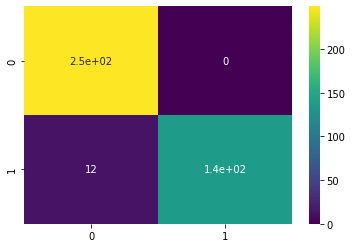

In [152]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,cmap='viridis')
plt.savefig('.\\figures\\confusion_matrix_train.png', dpi=300, bbox_inches='tight')

In [153]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       249
           1       1.00      0.92      0.96       149

    accuracy                           0.97       398
   macro avg       0.98      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



In [154]:
fpr , tpr , _ = roc_curve(y_train,final_model.predict_proba(X_train)[:,1])

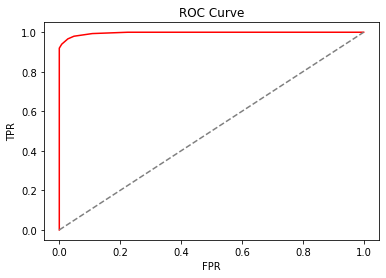

In [155]:
plt.plot(fpr,tpr,c='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.plot([0,1],[0,1],ls='--',c='gray')
plt.savefig('.\\figures\\ROC_train.png', dpi=300, bbox_inches='tight')

In [156]:
# Area under curve
roc_auc_score(y_train,final_model.predict_proba(X_train)[:,1])

0.9967521091075712

### 6.3 Evaluating the model with test data

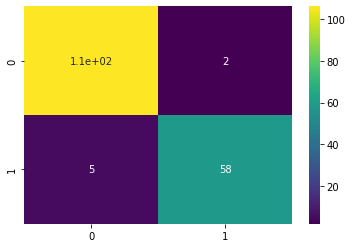

In [157]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap='viridis')
plt.savefig('.\\figures\\confusion_matrix_test.png', dpi=300, bbox_inches='tight')

In [158]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [159]:
fpr , tpr , _ = roc_curve(y_test,final_model.predict_proba(X_test)[:,1])

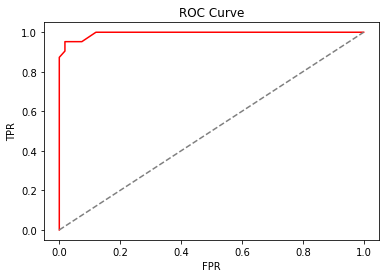

In [160]:
plt.plot(fpr,tpr,c='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.plot([0,1],[0,1],ls='--',c='gray')
plt.savefig('.\\figures\\ROC_test.png', dpi=300, bbox_inches='tight')

In [161]:
# Area under curve
roc_auc_score(y_test,final_model.predict_proba(X_test)[:,1])

0.9941945914168135

## 7. Obtaining the model to be implemented in the microcontroller

In [162]:
def generate_knn_arduino_header(X_train, y_train, k, dist_metric, p, algorithm, filename):
    # Dictionary for distance metrics
    dist_metric_dict = {
        "EUCLIDEAN": 0,
        "MANHATTAN": 1,
        "CHEBYSHEV": 2,
        "MINKOWSKI": 3
    }
    
    # Dictionary for algorithms
    algorithm_dict = {
        "AUTO": 0,
        "BALL_TREE": 1,
        "KD_TREE": 2,
        "BRUTE": 3
    }

    n_samples, n_features = X_train.shape

    # Arduino code header
    arduino_code = f"""
#ifndef KNN_MODEL_H
#define KNN_MODEL_H

#include <math.h>

// Definitions of distance types
#define EUCLIDEAN 0
#define MANHATTAN 1
#define CHEBYSHEV 2
#define MINKOWSKI 3

// Definitions of algorithm types
#define AUTO 0
#define BALL_TREE 1
#define KD_TREE 2
#define BRUTE 3

// Training data
float X_train[{n_samples}][{n_features}] = {{
"""
    
    # Inserting formatted X_train data
    for i in range(n_samples):
        arduino_code += "  {" + ", ".join(map(str, X_train[i])) + "}"
        if i < n_samples - 1:
            arduino_code += ","
        arduino_code += "\n"

    arduino_code += "};\n"

    # Inserting formatted y_train data
    arduino_code += f"int y_train[{len(y_train)}] = {{ {', '.join(map(str, y_train))} }};\n"

    # Distance functions and KNN classifier class
    arduino_code += f"""
// Function to calculate Euclidean distance
float euclidean(float point[], float data[], int length) {{
  float sum = 0;
  for (int i = 0; i < length; i++) {{
    sum += pow(point[i] - data[i], 2);
  }}
  return sqrt(sum);
}}

// Function to calculate Manhattan distance
float manhattan(float point[], float data[], int length) {{
  float sum = 0;
  for (int i = 0; i < length; i++) {{
    sum += abs(point[i] - data[i]);
  }}
  return sum;
}}

// Function to calculate Chebyshev distance
float chebyshev(float point[], float data[], int length) {{
  float max_diff = 0;
  for (int i = 0; i < length; i++) {{
    float diff = abs(point[i] - data[i]);
    if (diff > max_diff) {{
      max_diff = diff;
    }}
  }}
  return max_diff;
}}

// Function to calculate Minkowski distance
float minkowski(float point[], float data[], int length, float p) {{
  float sum = 0;
  for (int i = 0; i < length; i++) {{
    sum += pow(abs(point[i] - data[i]), p);
  }}
  return pow(sum, 1.0 / p);
}}

// Function to find the most common value in an array
int most_common(int lst[], int length) {{
  int maxCount = 0;
  int mostCommonValue = lst[0];
  for (int i = 0; i < length; i++) {{
    int count = 0;
    for (int j = 0; j < length; j++) {{
      if (lst[j] == lst[i]) count++;
    }}
    if (count > maxCount) {{
      maxCount = count;
      mostCommonValue = lst[i];
    }}
  }}
  return mostCommonValue;
}}

class KNeighborsClassifier {{
  public:
    int k;
    float (*X_train)[{n_features}];
    int* y_train;
    int X_train_rows;
    int X_train_cols;
    int dist_metric;
    float p;
    int algorithm;

    // Constructor
    KNeighborsClassifier(int k = {k}, int dist_metric = {dist_metric_dict[dist_metric]}, float p = {p}, int algorithm = {algorithm_dict[algorithm]}) {{
      this->k = k;
      this->dist_metric = dist_metric;
      this->p = p;
      this->algorithm = algorithm;
    }}

    // Fit method
    void fit(float X_train[][{n_features}], int y_train[], int rows, int cols) {{
      this->X_train = X_train;
      this->y_train = y_train;
      this->X_train_rows = rows;
      this->X_train_cols = cols;
    }}

    // Function to calculate distance based on selected metric
    float calculate_distance(float point[], float data[], int length) {{
      switch (dist_metric) {{
        case EUCLIDEAN:
          return euclidean(point, data, length);
        case MANHATTAN:
          return manhattan(point, data, length);
        case CHEBYSHEV:
          return chebyshev(point, data, length);
        case MINKOWSKI:
          return minkowski(point, data, length, p);
        default:
          return euclidean(point, data, length); // fallback to euclidean
      }}
    }}

    // Prediction method
    int* predict(float X_test[][{n_features}], int X_test_rows) {{
      int* neighbors = new int[X_test_rows];
      if (algorithm == BRUTE || algorithm == AUTO) {{
        for (int i = 0; i < X_test_rows; i++) {{
          float distances[this->X_train_rows];
          for (int j = 0; j < this->X_train_rows; j++) {{
            distances[j] = calculate_distance(X_test[i], this->X_train[j], this->X_train_cols);
          }}
          
          int y_sorted[this->X_train_rows];
          for (int m = 0; m < this->X_train_rows; m++) y_sorted[m] = this->y_train[m];

          for (int m = 0; m < this->X_train_rows - 1; m++) {{
            for (int n = m + 1; n < this->X_train_rows; n++) {{
              if (distances[m] > distances[n]) {{
                float temp_dist = distances[m];
                distances[m] = distances[n];
                distances[n] = temp_dist;
                int temp_y = y_sorted[m];
                y_sorted[m] = y_sorted[n];
                y_sorted[n] = temp_y;
              }}
            }}
          }}

          neighbors[i] = most_common(y_sorted, this->k);
        }}
      }} else {{
        Serial.println("Algorithm not supported in this implementation.");
        for (int i = 0; i < X_test_rows; i++) {{
          neighbors[i] = -1; // Error return
        }}
      }}
      return neighbors;
    }}

    // Evaluation method
    float evaluate(float X_test[][{n_features}], int y_test[], int X_test_rows) {{
      int* y_pred = predict(X_test, X_test_rows);
      int correct = 0;
      for (int i = 0; i < X_test_rows; i++) {{
        if (y_pred[i] == y_test[i]) correct++;
      }}
      delete[] y_pred;
      return (float)correct / X_test_rows;
    }}
}};

#endif // KNN_MODEL_H
"""

    # Writing the code to the .h file
    with open(filename, 'w') as f:
        f.write(arduino_code)

    print(f"File '{filename}' generated successfully.")

## 8. Saves the template in a .h file

In [170]:
p_value = float(final_model.best_estimator_.get_params()['knn__p'])
algorithm = final_model.best_estimator_.get_params()['knn__algorithm'].upper()
dist_metric = final_model.best_estimator_.get_params()['knn__metric'].upper()
X_train_cpp = X_train.values
y_train_cpp = y_train.values
n_features = 2
filename = ".\\KNN\\KNN.h"

In [171]:
print('p_value:', p_value)
print('dist_metric:', dist_metric)
print('algorithm:',algorithm)
print('k:', n_features )
print('filename:', filename)

p_value: 2.0
dist_metric: MINKOWSKI
algorithm: AUTO
k: 2
filename: .\KNN\KNN.h


In [172]:
generate_knn_arduino_header(X_train=X_train_cpp, y_train=y_train_cpp, k=n_features, dist_metric=dist_metric, p = p_value, algorithm=algorithm, filename=filename)

File '.\KNN\KNN.h' generated successfully.
